
<font size=5 color=#A52A2A >Deep Learning with CNNs OR RNNs (Sequence Models)

<font size=4 color=#A52A2A >Choice A- Deep Learning with CNNs
    
Yiqing Wang NUID:001563190

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import torchvision
from torch.utils.tensorboard import SummaryWriter
import os
import matplotlib.pyplot as plt
import numpy as np

<font size=4 color=#A52A2A >PART A - DEEP LEARNING MODEL (40 POINTS)

Load the image dataset.
    
Dataset Link: https://www.kaggle.com/miljan/stanford-dogs-dataset-traintest#

In [11]:
#Data directory
data_dir = os.path.abspath("CNN.ipynb")[:-len("CNN.ipynb")]

#Applying Transformation
train_transforms = transforms.Compose([
                                    transforms.Resize(32),
                                      transforms.CenterCrop(32),
                                transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(32),
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(data_dir + 'data/train',  
                                    transform=train_transforms)                                       
test_data = datasets.ImageFolder(data_dir + 'data/test', 
                                    transform=test_transforms)

In [12]:
#Creating loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

torch.Size([32, 3, 32, 32])

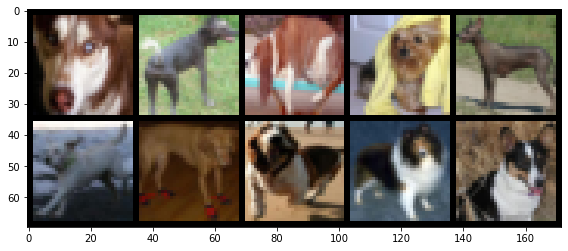

In [13]:
#Viewing the images
for images,labels in train_loader:
    break
im = make_grid(images[0:10], nrow= 5) 
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))
images.shape

<font size=4 color=#A52A2A >PART B - ACTIVATION FUNCTION (10 POINTS)
    
<font size=3 color=#A52A2A >Change the activation function. How does it affect accuracy? How does it affect how quickly the network plateaus?
    
Change relu to Leaky-relu, the result shows that Leaky-relu performs better than relu. So it has improved accuracy.

<font size=4 color=#A52A2A >PART C - COST FUNCTION (10 POINTS)  On your Deep Learning model.  
    
<font size=3 color=#A52A2A >Change the cost function. How does it affect accuracy? How does it affect how quickly the network plateaus?
    
Change the cost function, the result shows that NLL-Loss alogirthm does better than cross-entropy from the study.

<font size=4 color=#A52A2A >PART D - EPOCHS (10 POINTS)

<font size=3 color=#A52A2A >Change the number of epochs initialization. How does it affect accuracy?
How quickly does the network plateau?

Increasing from 5 to 10 has increased the accuracy. There is no plateuing at this point. 
We can see that after 30 epochs it doesnt cross 98.04% accuracy with chosen hyperparameters

<font size=4 color=#A52A2A >PART E - GRADIENT ESTIMATION (10 POINTS)

<font size=3 color=#A52A2A >Change the gradient estimation. How does it affect accuracy? How does it affect how quickly the network plateaus?

Adam seems to always do better than stochasatic gradient here. Stochastic Gradient's loss seems to be constant hence I'm not running it in my simulation.

<font size=4 color=#A52A2A >PART F - NETWORK ARCHITECTURE (10 POINTS)

<font size=3 color=#A52A2A >On your Deep Learning model change the network architecture. How does it affect accuracy? How does it affect how quickly the network plateaus?
  

Increasing the no. of hidden layers from 3 to 4 increases the accuracy to a large extent for this problem.

<font size=4 color=#A52A2A >PART G - NETWORK INITIALIZATION (10 POINTS)

<font size=3 color=#A52A2A >Change the network initialization. How does it affect accuracy? How does it affect how quickly the network plateaus?

Xavier leads to an increase in accuracy compared to the default torch init in the start of most simulations. The deault weights init does catch up eventually and performs better.

In [5]:
class Network(nn.Module):
    def __init__ (self, af, weights_init, hd_layers):
        super().__init__()
        self.af=af
        self.weights_init=weights_init
        self.hd_layers = hd_layers
        self.conv1 = nn.Conv2d(in_channels = 3,out_channels = 5,kernel_size = 5) 
        
        if weights_init=='xavier':
            torch.nn.init.xavier_uniform(self.conv1.weight)
        self.conv2 = nn.Conv2d(in_channels = 5,out_channels = 20,kernel_size = 3)         
        
        if self.hd_layers == 3:
            self.fc1 = nn.Linear(720,360)
            self.fc2 = nn.Linear(360,240)
            self.fc3 = nn.Linear(240,120)
        else:
            self.fc1 = nn.Linear(720,480)
            self.fc2 = nn.Linear(480,360)
            self.fc3 = nn.Linear(360,240)
            self.fc4 = nn.Linear(240,120)

    def forward(self,x):
        if self.af=='relu':
            x = F.relu(self.conv1(x))
            x = F.max_pool2d(x,2,2)
            x = F.relu(self.conv2(x))  
            x = F.max_pool2d(x,2,2)
            #Flattening
            x = x.view(-1,torch.prod(torch.tensor(x.shape[1:])).item())        

            x = F.relu(self.fc1(x))        
            x = F.relu(self.fc2(x))  
            x = F.log_softmax(self.fc3(x),dim = 1)    
            return(x)
        else:
            x = F.leaky_relu(self.conv1(x))
            x = F.max_pool2d(x,2,2)
            x = F.leaky_relu(self.conv2(x))  
            x = F.max_pool2d(x,2,2)

            x = x.view(-1,torch.prod(torch.tensor(x.shape[1:])).item())        

            x = F.leaky_relu(self.fc1(x))        
            x = F.leaky_relu(self.fc2(x))  
            x = F.log_softmax(self.fc3(x),dim = 1)    
            return(x)
            

In [6]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [7]:
from itertools import product

parameters = dict(
    af = ['relu','leaky_relu'],
    cf = ['cross_entropy','nll_loss'],
    epochs = [5,10],
    ge = ['adam'],
    hd_layers = [3,4],
    weights = ['default','xavier']
)

param_values = [v for v in parameters.values()]

for af,cf,epochs,ge,hd_layers,weights in product(*param_values):
    network = Network(af , weights, hd_layers)
    images, labels = next(iter(train_loader))
    grid = torchvision.utils.make_grid(images)
    comment = f' af={af} cf={cf} epochs={epochs} ge ={ge} weights = {weights}'
    tb = SummaryWriter(comment=comment)
    tb.add_image('images',grid)
    tb.add_graph(network,images)
    lr = 0.001
    
    if(ge=='adam'):
        optimizer = torch.optim.Adam(network.parameters(), lr = lr)
    else:
        optimizer = torch.optim.SGD(network.parameters(), lr = lr)
    print("Activation:",af,"Cost:",cf,"Epochs:",epochs,"Gradient:",ge,"Hidden layers:",hd_layers, "Weights:",weights)    
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_accuracy = 0
        b_num = 0#no. of batches
        # Run the training batches
        for batch in train_loader:
            b_num+=1
            images,labels = batch  

            # Apply the model
            preds = network(images)
            
            if cf =='nll_loss':
                loss = F.cross_entropy(preds,labels)#Calculating loss
            else:
                loss = F.nll_loss(preds,labels)

            # Updating parameters
            optimizer.zero_grad()
            loss.backward()#Calculating gradients
            optimizer.step()#Updating weights
                
            
            total_loss+=loss.item()
            total_correct+=get_num_correct(preds,labels)
            total_accuracy+=get_num_correct(preds,labels)/len(preds)

        tb.add_scalar("Loss", total_loss, epoch)
        tb.add_scalar("Correct", total_correct, epoch)
        tb.add_scalar("Accuracy", (total_accuracy/b_num)*100)

        tb.add_histogram("conv1.bias", network.conv1.bias, epoch)
        tb.add_histogram("conv1.weight", network.conv1.weight, epoch)
        tb.add_histogram("conv2.bias", network.conv2.bias, epoch)
        tb.add_histogram("conv2.weight", network.conv2.weight, epoch)

        print("epoch:", epoch, "total_correct:", total_correct, "loss:",total_loss,"accuracy:",(total_accuracy/b_num)*100)
    print()
tb.close()

/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: TracerWarning: Converting a tensor to a Python number might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a c

Activation: relu Cost: cross_entropy Epochs: 5 Gradient: adam Hidden layers: 3 Weights: default
epoch: 0 total_correct: 281 loss: 1700.880520582199 accuracy: 2.3416666666666663
epoch: 1 total_correct: 484 loss: 1590.1779763698578 accuracy: 4.033333333333333
epoch: 2 total_correct: 665 loss: 1541.1436507701874 accuracy: 5.541666666666667
epoch: 3 total_correct: 828 loss: 1500.9958865642548 accuracy: 6.9
epoch: 4 total_correct: 1030 loss: 1462.6166727542877 accuracy: 8.583333333333334



/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  # Remove the CWD from sys.path while we load stuff.


Activation: relu Cost: cross_entropy Epochs: 5 Gradient: adam Hidden layers: 3 Weights: xavier
epoch: 0 total_correct: 201 loss: 1749.936752796173 accuracy: 1.675
epoch: 1 total_correct: 497 loss: 1604.2701215744019 accuracy: 4.141666666666667
epoch: 2 total_correct: 648 loss: 1549.4653978347778 accuracy: 5.4
epoch: 3 total_correct: 778 loss: 1516.0440168380737 accuracy: 6.483333333333334
epoch: 4 total_correct: 905 loss: 1483.9119200706482 accuracy: 7.541666666666667

Activation: relu Cost: cross_entropy Epochs: 5 Gradient: adam Hidden layers: 4 Weights: default
epoch: 0 total_correct: 223 loss: 1749.1753568649292 accuracy: 1.8583333333333334
epoch: 1 total_correct: 463 loss: 1614.7817516326904 accuracy: 3.858333333333333
epoch: 2 total_correct: 664 loss: 1559.1211097240448 accuracy: 5.533333333333333
epoch: 3 total_correct: 833 loss: 1516.9019265174866 accuracy: 6.941666666666666
epoch: 4 total_correct: 967 loss: 1473.5056931972504 accuracy: 8.058333333333334

Activation: relu Cost: 

/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: TracerWarning: Converting a tensor to a Python number might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a c

Activation: leaky_relu Cost: cross_entropy Epochs: 5 Gradient: adam Hidden layers: 3 Weights: default
epoch: 0 total_correct: 184 loss: 1754.2047038078308 accuracy: 1.5333333333333332
epoch: 1 total_correct: 440 loss: 1622.80233335495 accuracy: 3.6666666666666665
epoch: 2 total_correct: 703 loss: 1554.3299021720886 accuracy: 5.858333333333333
epoch: 3 total_correct: 888 loss: 1497.8601598739624 accuracy: 7.3999999999999995
epoch: 4 total_correct: 1136 loss: 1446.4109289646149 accuracy: 9.466666666666667

Activation: leaky_relu Cost: cross_entropy Epochs: 5 Gradient: adam Hidden layers: 3 Weights: xavier
epoch: 0 total_correct: 203 loss: 1759.3517198562622 accuracy: 1.6916666666666667
epoch: 1 total_correct: 510 loss: 1598.301304101944 accuracy: 4.25
epoch: 2 total_correct: 750 loss: 1532.1344811916351 accuracy: 6.25
epoch: 3 total_correct: 948 loss: 1477.8821187019348 accuracy: 7.9
epoch: 4 total_correct: 1230 loss: 1420.6004612445831 accuracy: 10.25

Activation: leaky_relu Cost: cross

In [10]:
from itertools import product

parameters = dict(
    af = ['leaky-relu'],
    cf = ['nll_loss'],
    epochs = [30],
    ge = ['adam'],
    hd_layers = [4],
    weights = ['xavier']
)

param_values = [v for v in parameters.values()]

for af,cf,epochs,ge,hd_layers,weights in product(*param_values):
    network = Network(af , weights, hd_layers)
    images, labels = next(iter(train_loader))
    grid = torchvision.utils.make_grid(images)
    comment = f' af={af} cf={cf} epochs={epochs} ge ={ge} weights = {weights}'
    lr = 0.001
    
    if(ge=='adam'):
        optimizer = torch.optim.Adam(network.parameters(), lr = lr)
    else:
        optimizer = torch.optim.SGD(network.parameters(), lr = lr)
    print("Activation:",af,"Cost:",cf,"Epochs:",epochs,"Gradient:",ge,"Hidden layers:",hd_layers, "Weights:",weights)    
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_accuracy = 0
        # Run the training batches
        b_num = 0#no. of batches
        for batch in train_loader:
            b_num+=1
            images,labels = batch  
            # Apply the model
            preds = network(images)
            if cf =='nll_loss':
                loss = F.cross_entropy(preds,labels)#Calculating loss
            else:
                loss = F.nll_loss(preds,labels)

            # Updating parameters
            optimizer.zero_grad()
            loss.backward()#Calculating gradients
            optimizer.step()#Updating weights
            
            total_loss+=loss.item()
            total_correct+=get_num_correct(preds,labels)
            total_accuracy+=get_num_correct(preds,labels)/len(preds)
        
        print("epoch:", epoch, "total_correct:", total_correct, "loss:",total_loss,"accuracy:",(total_accuracy/b_num)*100)
    print()
tb.close()

/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  # Remove the CWD from sys.path while we load stuff.


Activation: leaky-relu Cost: nll_loss Epochs: 30 Gradient: adam Hidden layers: 4 Weights: xavier
epoch: 0 total_correct: 222 loss: 1755.9703397750854 accuracy: 1.8499999999999999
epoch: 1 total_correct: 505 loss: 1612.5154023170471 accuracy: 4.208333333333333
epoch: 2 total_correct: 765 loss: 1544.8693878650665 accuracy: 6.375
epoch: 3 total_correct: 953 loss: 1486.0808329582214 accuracy: 7.941666666666666
epoch: 4 total_correct: 1257 loss: 1418.246745109558 accuracy: 10.475
epoch: 5 total_correct: 1640 loss: 1343.3072452545166 accuracy: 13.666666666666666
epoch: 6 total_correct: 2184 loss: 1248.7209160327911 accuracy: 18.2
epoch: 7 total_correct: 2805 loss: 1137.847812652588 accuracy: 23.375
epoch: 8 total_correct: 3718 loss: 997.3711667060852 accuracy: 30.983333333333334
epoch: 9 total_correct: 4857 loss: 835.8898260593414 accuracy: 40.475
epoch: 10 total_correct: 6345 loss: 649.8859177827835 accuracy: 52.87500000000001
epoch: 11 total_correct: 7834 loss: 473.4875698685646 accuracy: 

<font size=5 color=#A52A2A >References

[1]: Dataset : https://www.kaggle.com/miljan/stanford-dogs-dataset-traintest#

<font size=5 color=#A52A2A >Licensing
    
Copyright 2022 Yiqing Wang

Persons who have obtained a copy of the software and associated documentation files may use the software free of charge without restriction. Publish, distribute, sublicense and/or sell copies of the software, subject to the following conditions:

THIS SOFTWARE IS PROVIDED "AS IS" WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NON-INFRINGEMENT WARRANTIES. 
    
In no event shall the author or copyright holder be liable for any claim, damage or other liability, whether in contract, tort or otherwise, arising out of or in connection with the software or its use or other dealings. software.